In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from glob import glob

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file, sheet_name):
    return pd.read_excel(file, sheet_name=sheet_name)

In [3]:
def load_all_data():
    files = glob('/Users/sabin/Documents/Project/뉴스와 소셜데이터 기반 이슈 분석 및 시각화/Trend-analysis/dataset/차별금지법(59,421건)/*.xlsx')
    df = pd.DataFrame()
    for file in files:
        df = df.append(load_data(file, '블로그'))
    return df

blog = load_all_data()

## 블로그 Sheet

In [4]:
blog.isna().sum()

Unnamed: 0      0
Unnamed: 1      0
Unnamed: 2      8
Unnamed: 3    149
dtype: int64

In [5]:
blog.columns = blog.iloc[0]
blog.drop(0, inplace=True, axis=0)
blog = blog.dropna(axis=0, how='any')
blog = blog[~blog['내용'].str.contains('http')]
blog = blog[blog['내용'].str.contains('[가-힣]')]
blog = blog[blog['내용'].str.len() < 1000]

print(blog.shape)
blog.head()

(1662, 4)


,작성일,작성자,제목,내용
24,2021/07/08,gbhana,"평등으로 위장된 ‘차별금지법’ 반대한다, 철회하라!","한교총, ‘차별금지법 반대 기도회’ \n소강석 목사 “차별금지법 저지해야” \n“평..."
34,2021/07/10,onepointministry,차별금지법이 통과한다면 벌어지는 일들,2018.8.29. 수요일에 국가인권위원회 인권센터에서 1차 차별금지법 토론이 있었...
39,2021/08/05,freedomphil,법앞의 평등을 위반하는 차별금지법,법앞의 평등을 위반하는 차별금지법 \n이 자료는 2021.8월 4일 바른사회시민회...
43,2021/09/30,pcnorkr,‘포괄적 차별금지법(평등법) 무엇이 문제인가?’ 서울지역 시민 공청회 개최,‘포괄적 차별금지법(평등법) 무엇이 문제인가?’ 서울지역 시민 공청회 개최 \n10...
48,2021/07/25,dkrlqkdwl,차별금지법에 대하여,"차별금지법에 대해 많이 들어왔고, 찬성진영과 반대진영의 이야기를 모두 들어보았다. ..."


In [6]:
def tfdif(corpus):
    cv = CountVectorizer(ngram_range=(1, 2), max_features=1000)
    document_term_matrix = cv.fit_transform(corpus)

    tf = pd.DataFrame(document_term_matrix.toarray(), columns=cv.get_feature_names())  # TF (Term Frequency)

    D = len(tf)
    df = tf.astype(bool).sum(axis=0)
    idf = np.log((D+1) / (df+1)) + 1             # IDF (Inverse Document Frequency)

    # TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf = tf * idf                      
    tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)
    
    return tfidf


In [7]:
tfidf_blog = tfdif(blog['내용'])

In [8]:
import pickle

tfidf_blog.to_pickle('tfidf_blog.pkl')

In [9]:
tfidf_blog

,00,010,02,06,07,10,10만,11,11시,11월,...,활동을,회장,후보,후보가,후보는,후보를,후보의,후에,힘을,힘이
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.126819,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1658,0.0,0.0,0.0,0.0,0.0,0.092904,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1659,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.113618,0.0
1660,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


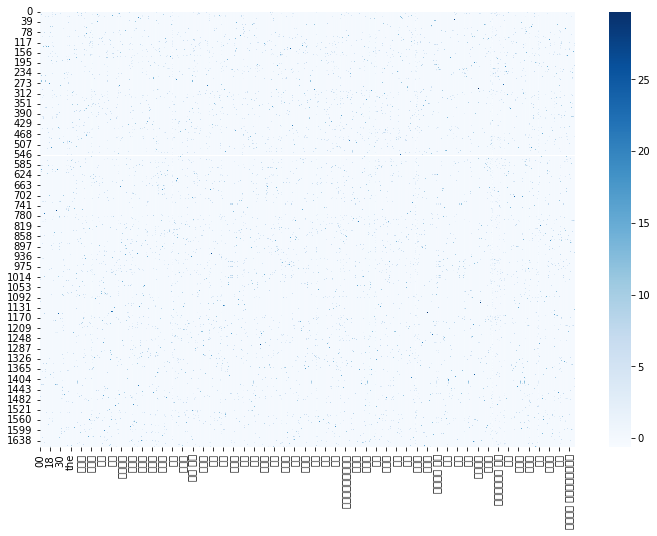

In [10]:
tfidf_blog = (tfidf_blog - tfidf_blog.mean()) / tfidf_blog.std()

# visualize

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_blog, cmap='Blues')
plt.show()


# TFDIF

We couldn't figure the relationship between the words linearly

as we can see in the graph above